In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/spam.tsv", sep="\t")
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


### Check for Null Values

In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.shape

(5572, 4)

In [5]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Note: Data is not balanced.

To balance, the ham messages will be undersampled.

## Dataset Balancing

In [6]:
# filter ham
ham = df[df["label"] == "ham"]

ham.shape

(4825, 4)

In [7]:
spam = df[df["label"]=="spam"]
spam.shape

(747, 4)

In [8]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

Concatenate ham and spam messages,row-wise

In [9]:
data = pd.concat([ham, spam], axis=0,ignore_index=True)
data.shape

(1494, 4)

In [10]:
data.sample(10)

,label,message,length,punct
1047,spam,FreeMsg: Hey - I'm Buffy. 25 and love to satis...,154,7
815,spam,Want 2 get laid tonight? Want real Dogging loc...,159,7
905,spam,18 days to Euro2004 kickoff! U will be kept in...,135,3
563,ham,Fine i miss you very much.,26,1
278,ham,I don't think I can get away for a trek that l...,76,2
931,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...,143,7
130,ham,Ok then no need to tell me anything i am going...,66,0
1327,spam,URGENT. Important information for 02 user. Tod...,163,10
63,ham,Do you like Italian food?,25,1
1284,spam,You will be receiving this week's Triple Echo ...,73,3


### Exploratory Data Analysis

In [11]:
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (10, 4)
plt.style.use("ggplot")

In [12]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

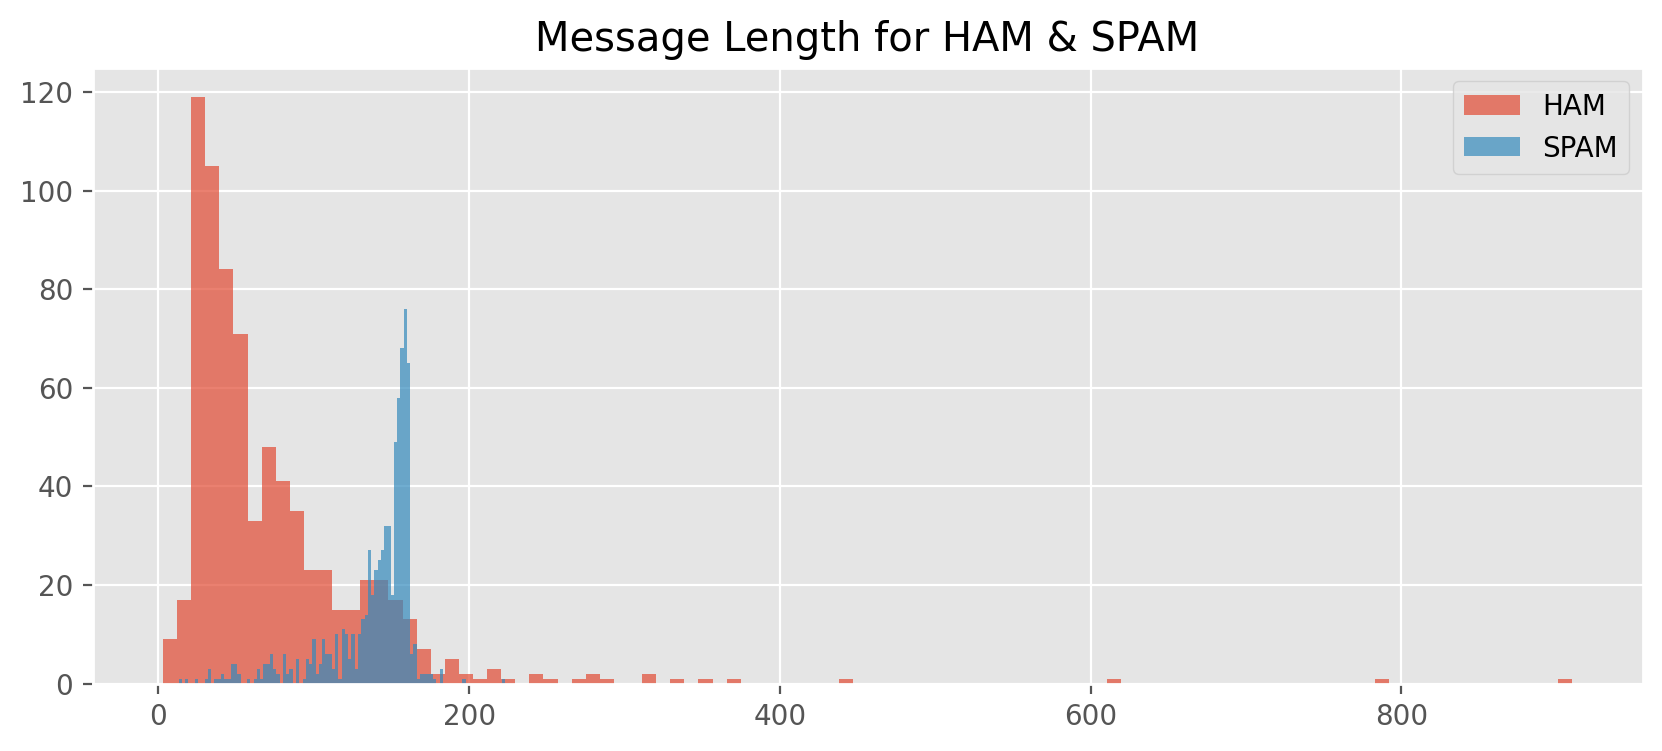

In [13]:
plt.hist(ham["length"], bins=100, alpha=0.7, label="HAM")
plt.hist(spam["length"], bins=100, alpha=0.7, label="SPAM")
plt.title("Message Length for HAM & SPAM")
plt.legend()
plt.show()

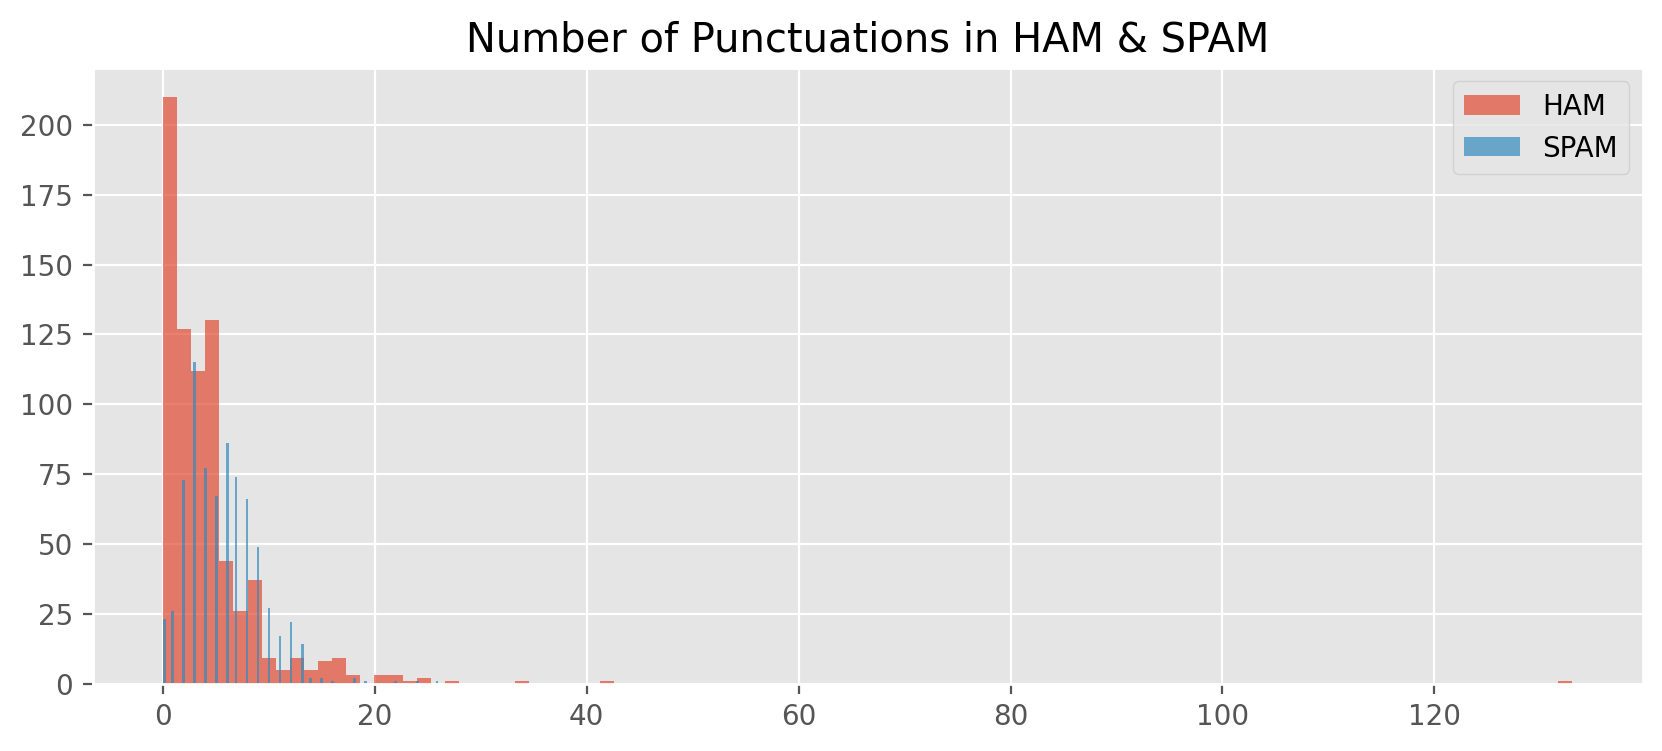

In [14]:
plt.hist(ham["punct"], bins=100, alpha=0.7, label="HAM")
plt.hist(spam["punct"], bins=100, alpha=0.7, label="SPAM")
plt.title("Number of Punctuations in HAM & SPAM")
plt.legend()
plt.show()

### Data Preprocessing for Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'sklearn'

#### Train-test Split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data["message"], data["label"],
                                                   test_size=0.2,
                                                   random_state=0,
                                                   shuffle=True,
                                                   stratify=data["label"])

X_train.shape, X_test.shape

((1195,), (299,))

### Build TFIDF Vectorizer and Random Forest Model

In [ ]:
clf = Pipeline([("tfidf", TfidfVectorizer()),
                ("rfc", RandomForestClassifier(n_estimators=100, n_jobs= -1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [ ]:
clf.predict(["congratulations!!, you got the job. Attached with this mail is your offer letter",
             "You have won $30 iPhone coupon, click here to claim"])

array(['ham', 'spam'], dtype=object)

In [ ]:
clf.classes_

array(['ham', 'spam'], dtype=object)

### Save Model in Binary Mode

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open("model.pkl", "wb"))

### Load Model

In [ ]:
model = pickle.load(open("model.pkl", "rb"))   # rb means read binary

In [ ]:
model_pred = model.predict(["congratulations!!, you got the job. Attached with this mail is your offer letter",
             "You have won $30 iPhone coupon, click here to claim"])

print(model_pred)

['ham' 'spam']
